# Capstone Project

## Analyzing Bitcoin Price Dynamics

Bitcoin, the pioneering cryptocurrency, has captured the world's attention as a decentralized digital asset witha fluctuating market value. This dataset offers a comprehensive record of Bitcoin's price evolution. Each record includes essential information such as the open, high, low, and close prices, alongside associated trading volume. This dataset provides an invaluable resource for those interested in studying Bitcoin's price trends and market dynamics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bitcoin_2017_to_2023.csv")
df.head()


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [3]:
df.shape


(3126000, 10)

In [4]:
df.describe()


,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


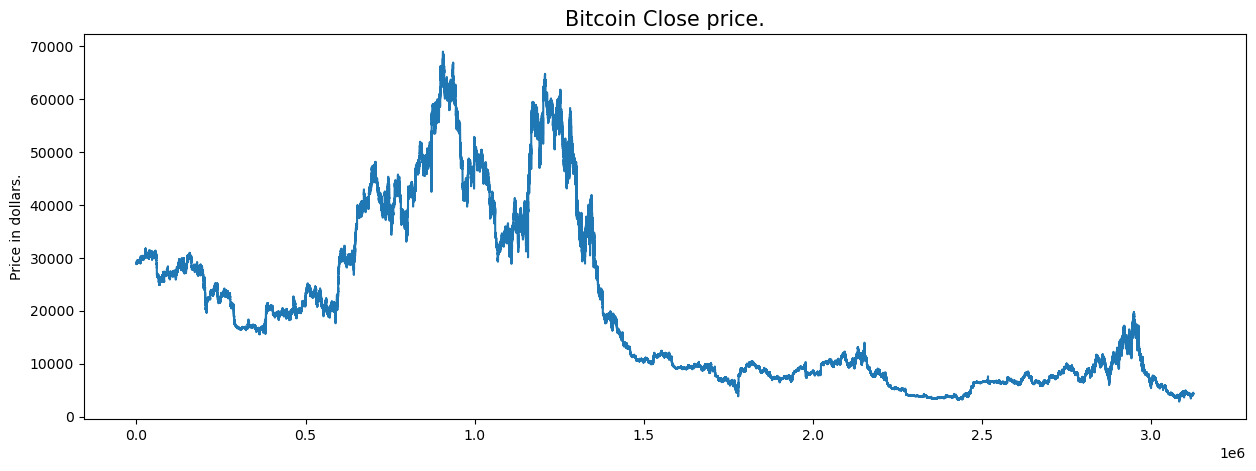

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [7]:
df.isnull().sum()


timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

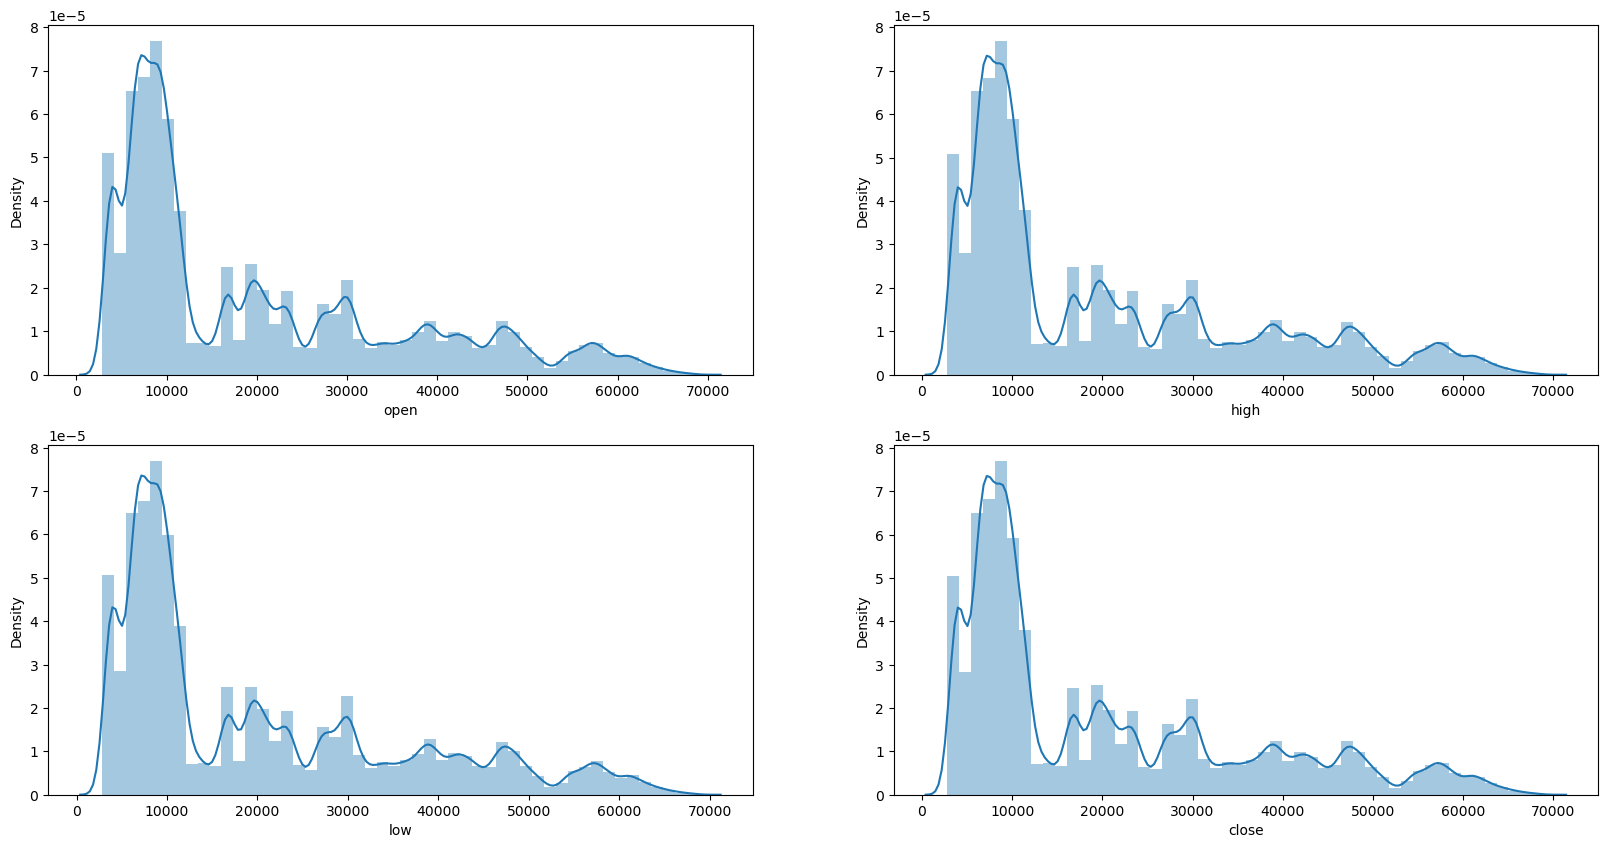

In [8]:
features = ['open', 'high', 'low', 'close']
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.distplot(df[col])
plt.show()


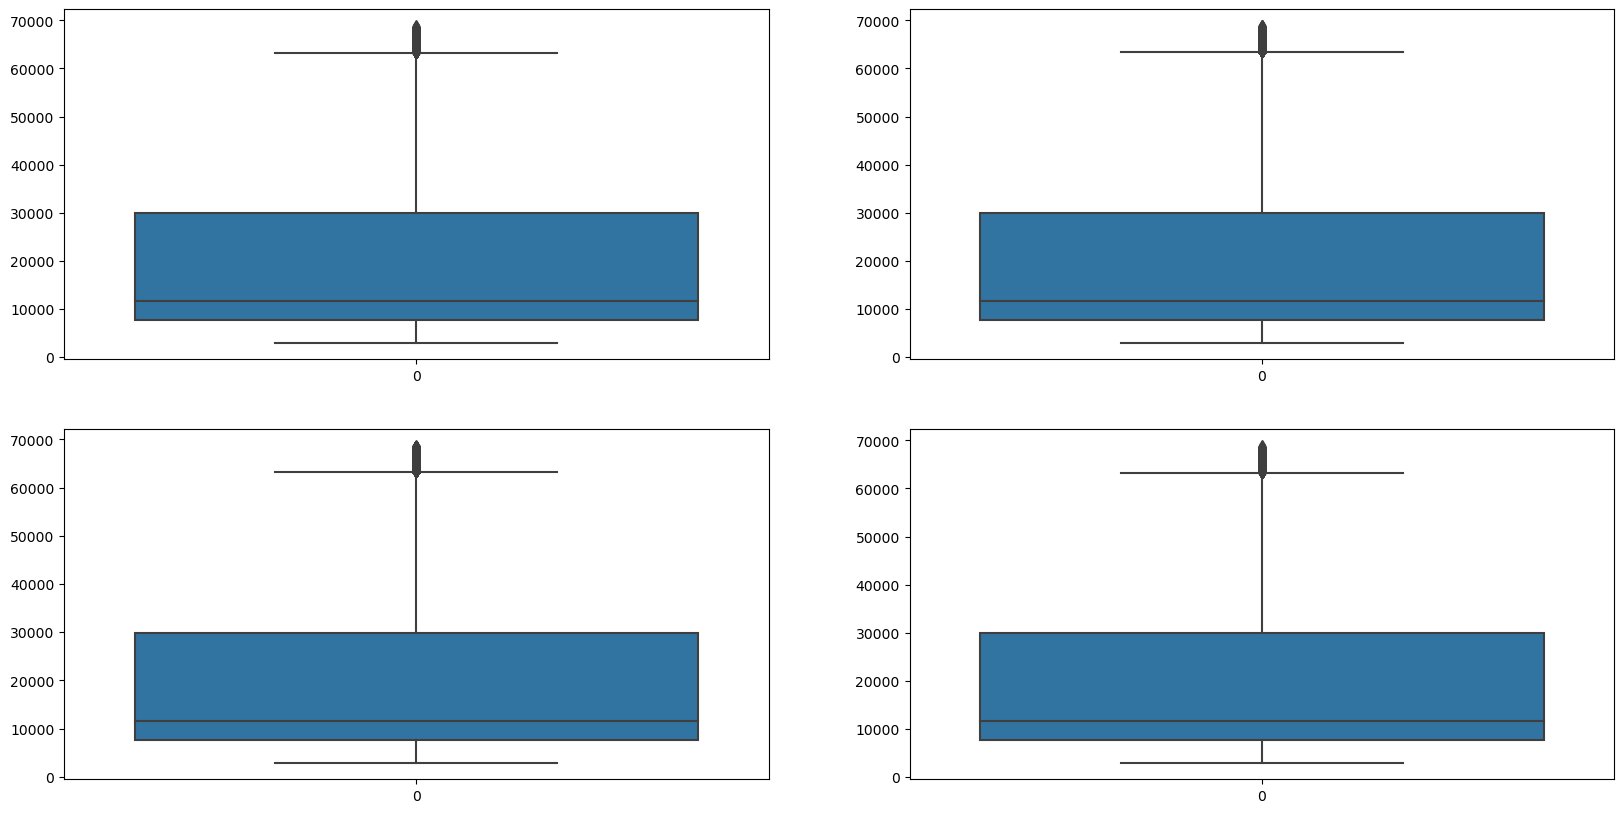

In [9]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

In [10]:
splitted = df['timestamp'].str.split(' ', expand=True)
df['date'] = splitted[0].astype('object')
splitted = df['date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
df = df.drop(['timestamp'], axis=1)
df = df.drop(['date'], axis=1)

df.head()


,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,year,month,day
0,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836,2023,8,1
1,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195,2023,8,1
2,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121,2023,8,1
3,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916,2023,8,1
4,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611,2023,8,1


In [11]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,year,month,day,is_quarter_end
0,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836,2023,8,1,0
1,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195,2023,8,1,0
2,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121,2023,8,1,0
3,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916,2023,8,1,0
4,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611,2023,8,1,0


In [12]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)


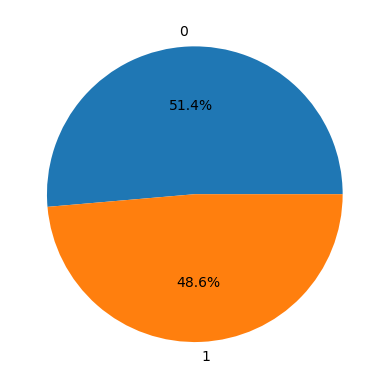

In [13]:
plt.pie(df['target'].value_counts().values, 
labels=[0, 1], autopct='%1.1f%%')
plt.show()


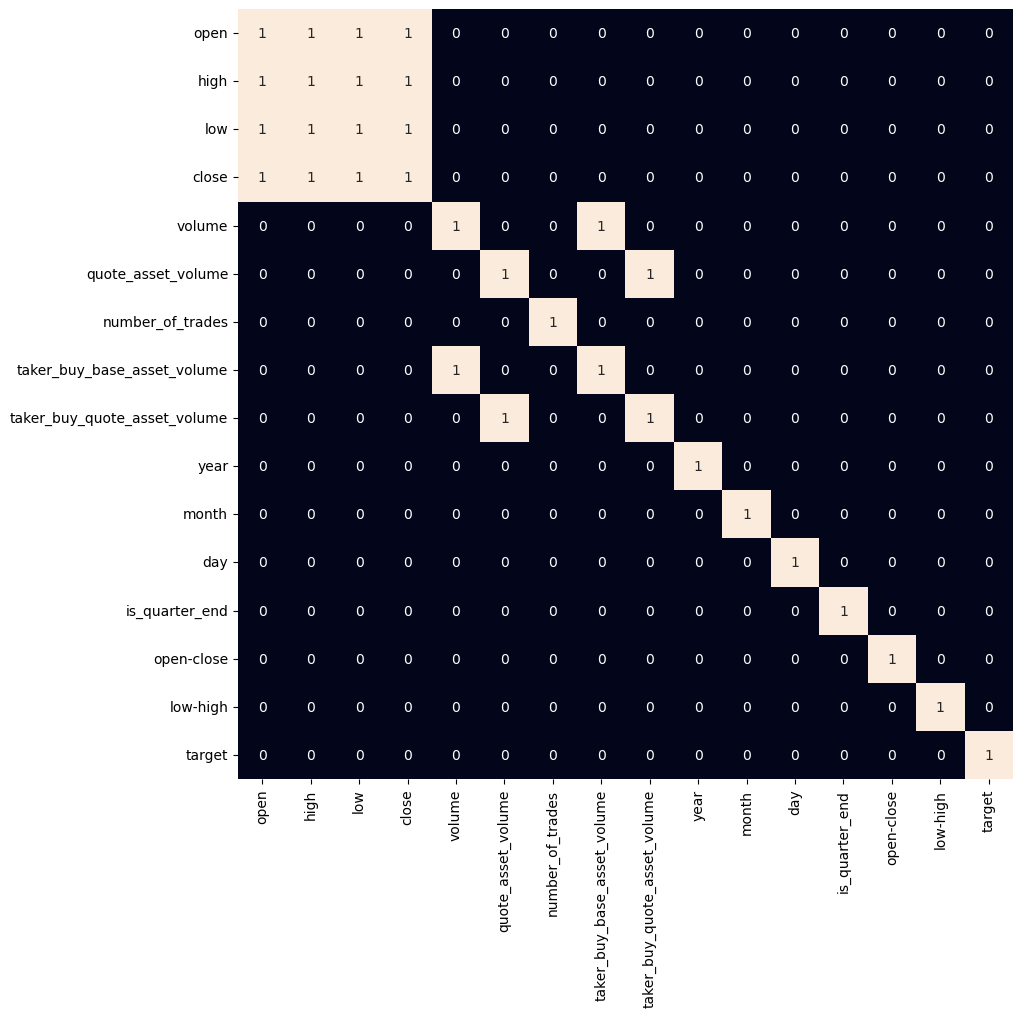

In [14]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly correlated features only so, we will visualize our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


### Logistic Regression Model

In [17]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_test.shape)


(2813400, 3) (312600, 3)


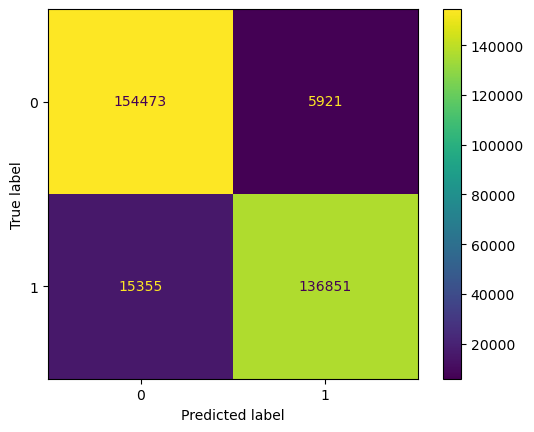

In [19]:
model= LogisticRegression()

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

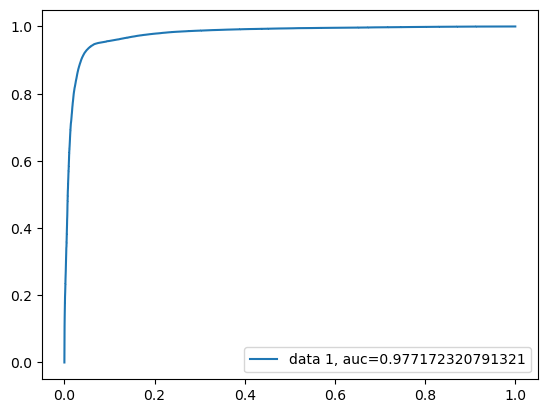

In [20]:
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr,_= metrics.roc_curve(Y_test,  y_pred)
auc = metrics.roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:

print(f'Logistic Regression : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train,model.predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_test,model.predict_proba(X_test)[:,1]))
print()


Logistic Regression : 
Training Accuracy :  0.9776479884792824
Validation Accuracy :  0.977172320791321



### Decission Tree

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [23]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_test.shape)


(2813400, 3) (312600, 3)


[Text(0.5, 0.9166666666666666, 'open-close <= 0.005\ngini = 0.5\nsamples = 2813400\nvalue = [1445299, 1368101]\nclass = PRICE-HIGH'),
 Text(0.25, 0.75, 'open-close <= -0.995\ngini = 0.099\nsamples = 1447305\nvalue = [1371729, 75576]\nclass = PRICE-HIGH'),
 Text(0.125, 0.5833333333333334, 'open-close <= -3.005\ngini = 0.04\nsamples = 1137771\nvalue = [1114347, 23424]\nclass = PRICE-HIGH'),
 Text(0.0625, 0.4166666666666667, 'open-close <= -5.015\ngini = 0.024\nsamples = 874508\nvalue = [864097, 10411]\nclass = PRICE-HIGH'),
 Text(0.03125, 0.25, 'open-close <= -30.045\ngini = 0.019\nsamples = 706002\nvalue = [699191, 6811]\nclass = PRICE-HIGH'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.007\nsamples = 171997\nvalue = [171403, 594]\nclass = PRICE-HIGH'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.023\nsamples = 534005\nvalue = [527788, 6217]\nclass = PRICE-HIGH'),
 Text(0.09375, 0.25, 'high-low <= -12.755\ngini = 0.042\nsamples = 168506\nvalue = [164906, 3600]\nclass = PRICE-HIGH'

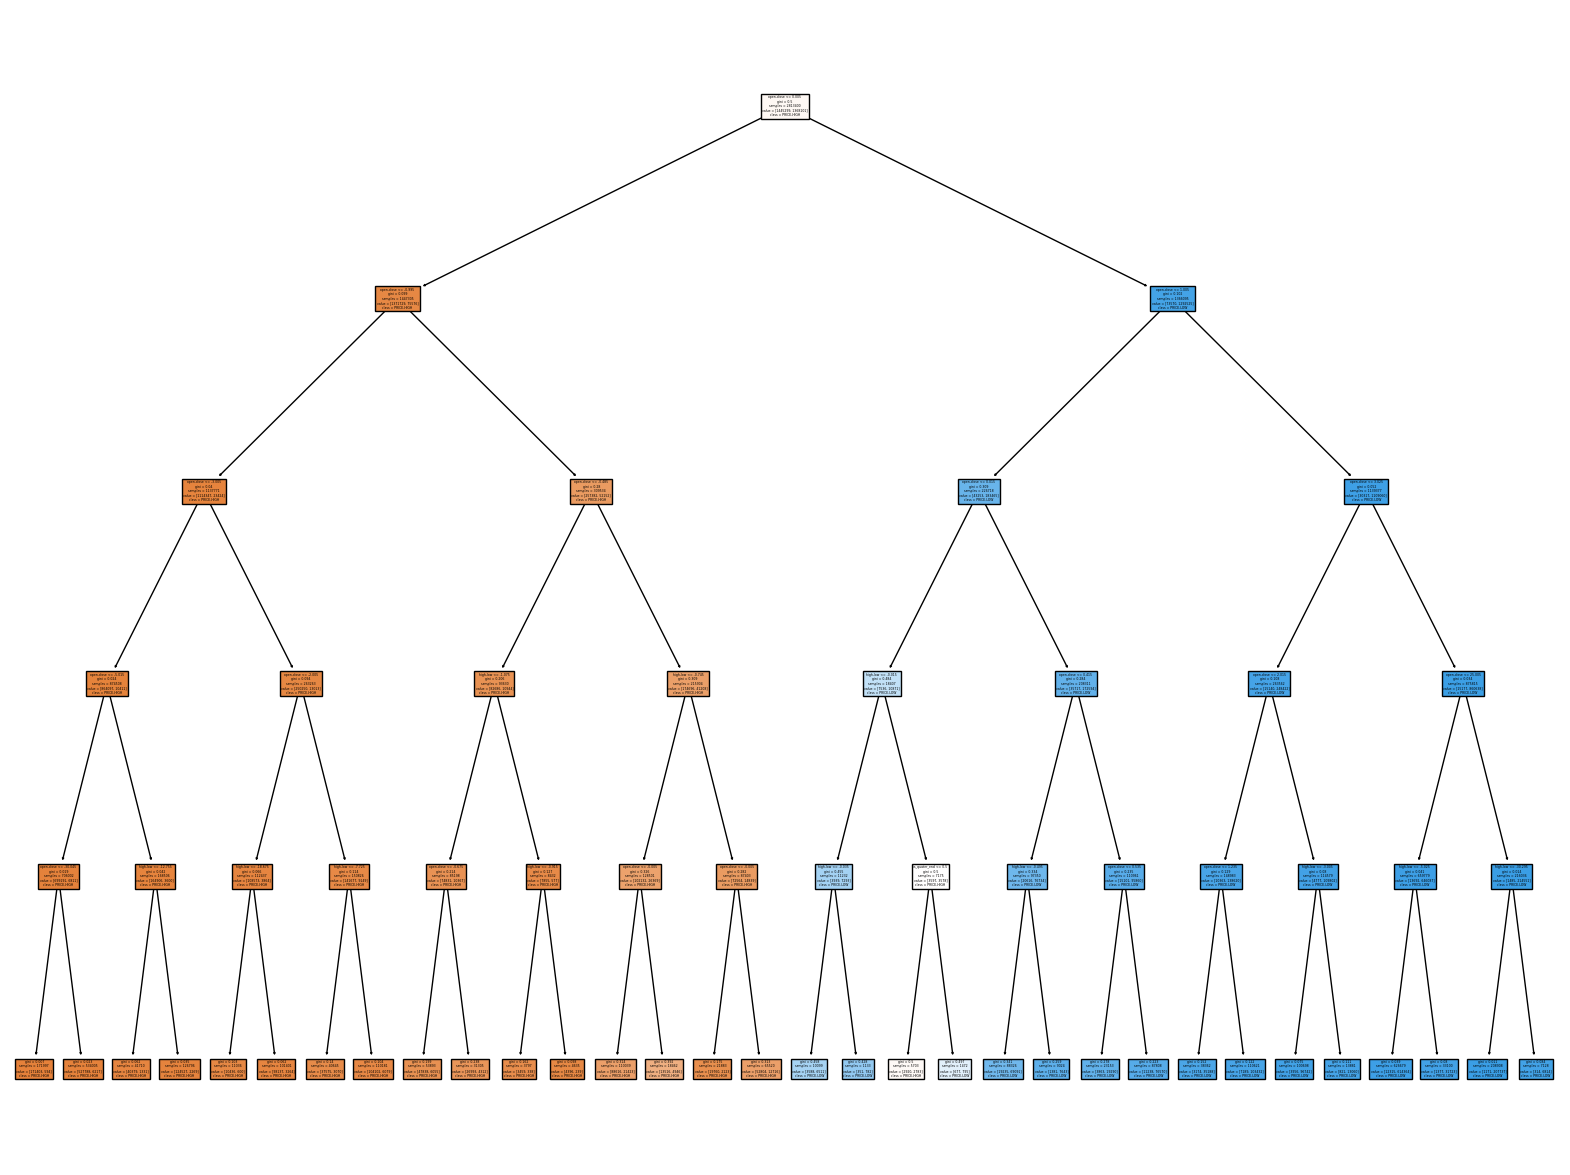

In [33]:
Y_Pred = clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_Pred)


plt.figure(figsize=(20,15))
tree.plot_tree(clf, feature_names=['open-close', 'high-low', 'is_quater_end'], class_names=['PRICE-HIGH','PRICE-LOW'], filled=True)

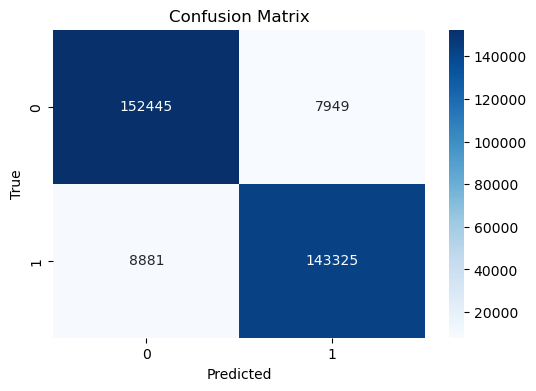

In [34]:

plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

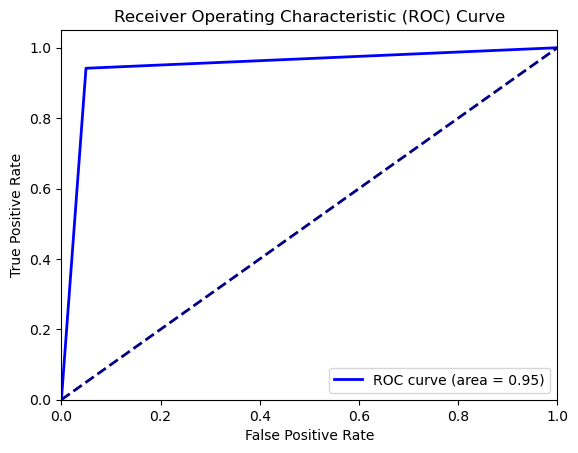

In [35]:
fpr, tpr, _ = roc_curve(Y_test, Y_Pred)
auc_value = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,Y_train)
Y_Pred= clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_Pred)
print(f'Accuracy:{accuracy * 100:.2f}%')

Accuracy:94.62%


## Conclusion 
### Logistic Regression
The ROC curve here is almost touching the top-left corner of the plot. This means the model has a very high True Positive Rate and a low False Positive Rate. The closer the curve is to the upper-left corner, the better the performance of the model in distinguishing between classes.
The model depicted by this ROC curve is performing exceptionally well, as the curve quickly rises to 1.0 on the True Positive Rate axis, indicating that the model captures almost all positive instances with few false positives.
The AUC score displayed in the plot is 0.975, which means the model performs very well.

AUC = 0.975 suggests that 97.5% of the time, the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance.

An AUC of 1.0 represents a perfect model.
0.975 is very close to 1.0, implying that the model is highly accurate in predicting both positive and negative classes.

### Decision Tree
The ROC curve is close to the top-left corner, which indicates that the model has a high True Positive Rate with a low False Positive Rate, meaning it is performing well in distinguishing between the classes.

The AUC (Area Under the Curve) for this curve is 0.95. This value indicates that the model is performing very well.
1.0 means perfect classification.
0.95 is very close to 1, signifying that the model can distinguish between positive and negative classes with high accuracy.
An AUC of 0.95 means that in 95% of randomly chosen cases, the model will correctly rank a randomly selected positive instance higher than a randomly chosen negative instance.

The closer the ROC curve is to the upper left corner, the better the model is at classification, as it means the model maximizes TPR while minimizing FPR.
The ROC curve and AUC score show that the model performs very well. A model with a high AUC like 0.95 is excellent for scenarios where it is crucial to maximize true positive predictions while minimizing false positives.